In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scipy
%matplotlib inline

In [2]:
df = pd.read_csv('desafio1.csv')

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
df['estado_residencia'].value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

In [5]:
df['nivel_estabilidade'].value_counts()

7     726
8     725
3     724
2     721
1     720
5     718
9     700
4     683
6     664
10    325
0     294
Name: nivel_estabilidade, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [7]:
df.describe().round(2)

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00,7000.00
mean,3500.50,649.79,38.89,5.01,76471.88,1.53,0.70,0.51
std,2020.87,97.05,10.47,2.89,62403.38,0.58,0.46,0.50
min,1.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00
25%,1750.75,582.00,32.00,3.00,0.00,1.00,0.00,0.00
50%,3500.50,651.00,37.00,5.00,97277.13,1.00,1.00,1.00
75%,5250.25,717.00,44.00,7.25,127537.16,2.00,1.00,1.00
max,7000.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00


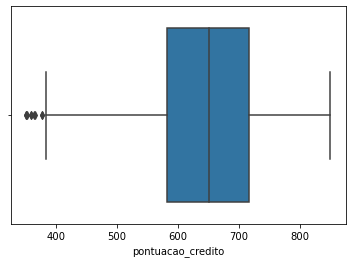

In [8]:
sns.boxplot(x = 'pontuacao_credito', data = df)

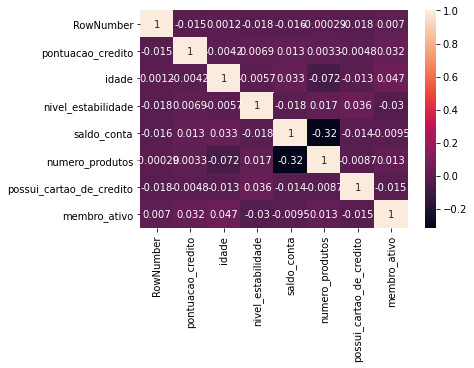

In [9]:
sns.heatmap(df.corr(method = 'spearman'), annot = True)

In [10]:
media = df.groupby('estado_residencia')['pontuacao_credito'].mean().round(2)

In [11]:
moda = df.groupby('estado_residencia')['pontuacao_credito'].agg(pd.Series.mode)

In [12]:
desvio = df.groupby('estado_residencia')['pontuacao_credito'].std().round(2)

In [13]:
estado = df['estado_residencia'].unique()

In [14]:
mediana = df.groupby('estado_residencia')['pontuacao_credito'].median()

In [29]:
estado = df['estado_residencia'].unique()

In [43]:
media

estado_residencia
PR    648.96
RS    651.11
SC    649.54
Name: pontuacao_credito, dtype: float64

In [47]:
mediana

estado_residencia
PR    650
RS    650
SC    653
Name: pontuacao_credito, dtype: int64

In [53]:
desvio

estado_residencia
PR    98.61
RS    95.14
SC    97.23
Name: pontuacao_credito, dtype: float64

In [44]:
estado[0]

'SC'

In [51]:
data = pd.DataFrame({estado[2]:[desvio[0],mediana[0], moda[0], media[0]],
                    estado[1]: [desvio[1], mediana[1], moda[1], media[1]],
                    estado[0]: [desvio[2], mediana[2], moda[2], media[2]]}, index = {'media', 'mediana', 'moda', 'desvio_padrao'})

In [52]:
data

,PR,RS,SC
desvio_padrao,98.61,95.14,97.23
mediana,650.00,650.00,653.00
moda,850.00,850.00,850.00
media,648.96,651.11,649.54


In [54]:
data.to_json(r'C:\Users\natas\Codenation\coestatistica-1\submission.json')